**21-03-15 python 13_데이터 시각화_예제2 (c)cherryuki (ji)**

### 1.필요한 라이브러리를 로드하고 시각화에서 디스플레이를 선명하게 표시되도록 하고, 한글 폰트가 나오도록 설정하고 확인한다.

In [1]:
#새 파일 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
import pandas as pd
import numpy as np
import seaborn as sns

### 2.https://www.data.go.kr에서 “상가(상권)정보”를 다운 받아, 서울과 부산데이터만 df 변수에 읽어들인다.

In [2]:
df_seoul = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_서울_202012.csv', encoding='utf8', sep='|')
df_pusan = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_부산_202012.csv', encoding='utf8', sep='|')

C:\Users\Home\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_seoul.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197


In [4]:
all(df_pusan.columns==df_seoul.columns)

True

In [5]:
df_data = pd.concat([df_seoul, df_pusan])
df_data.reset_index(inplace=True)
df_data.sample(3)

,index,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
344446,344446,17216543,회장님댁,신천점,Q,음식,Q09,유흥주점,Q09A07,기타일반유흥주점,...,1171010100101800006000657,NaN,서울특별시 송파구 올림픽로12길 4-23,138861,5557.0,NaN,1,NaN,127.081590,37.511096
301622,301622,20747964,슈튜어트와이츠먼,NaN,D,소매,D05,의복의류,D05A03,여성의류전문점,...,1168010500101590007016829,무역센터현대백화점,서울특별시 강남구 테헤란로 517,135730,6164.0,NaN,3,NaN,127.059745,37.508608
214804,214804,24508426,세종마트,NaN,D,소매,D03,종합소매점,D03A02,수퍼마켓,...,1111010900101660118029354,NaN,서울특별시 종로구 옥인6길 5,110041,3038.0,NaN,1,1,126.964365,37.581894


### 3.df 데이터 셋의 결측치 확인 및 시각화

① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.

In [6]:
df_data.columns

Index(['index', '상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
df_data.head(3)

,index,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689


In [8]:
df_data.tail(3)

,index,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
488528,141951,17211619,24시간의신화,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,2647010200103670032021391,NaN,부산광역시 연제구 과정로 288,611816,47562.0,NaN,1,NaN,129.096057,35.188529
488529,141952,17222726,현대헬스케어,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,...,2638010100111180024005767,NaN,부산광역시 사하구 낙동대로 332,604816,49344.0,NaN,3,NaN,128.980941,35.100503
488530,141953,17208077,동안뷰티#,NaN,F,생활서비스,F01,이/미용/건강,F01A03,비만/피부관리,...,2638010500102740004019622,NaN,부산광역시 사하구 다대로277번길 13,604840,49509.0,NaN,2,NaN,128.978265,35.077620


② df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력하고 변수가 사용되는 메모리 사용량 확인한다.

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488531 entries, 0 to 488530
Data columns (total 40 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      488531 non-null  int64  
 1   상가업소번호     488531 non-null  int64  
 2   상호명        488529 non-null  object 
 3   지점명        78537 non-null   object 
 4   상권업종대분류코드  488531 non-null  object 
 5   상권업종대분류명   488531 non-null  object 
 6   상권업종중분류코드  488531 non-null  object 
 7   상권업종중분류명   488531 non-null  object 
 8   상권업종소분류코드  488531 non-null  object 
 9   상권업종소분류명   488531 non-null  object 
 10  표준산업분류코드   459664 non-null  object 
 11  표준산업분류명    459664 non-null  object 
 12  시도코드       488531 non-null  int64  
 13  시도명        488531 non-null  object 
 14  시군구코드      488531 non-null  int64  
 15  시군구명       488531 non-null  object 
 16  행정동코드      488531 non-null  int64  
 17  행정동명       488212 non-null  object 
 18  법정동코드      488531 non-null  int64  
 19  법정동명       488531 non-n

In [10]:
df_data.shape

(488531, 40)

In [11]:
df_data.isnull().sum().sort_values()

index             0
구우편번호             0
도로명주소             0
건물관리번호            0
건물본번지             0
도로명               0
도로명코드             0
지번주소              0
지번본번지             0
대지구분명             0
대지구분코드            0
지번코드              0
경도                0
법정동코드             0
행정동코드             0
법정동명              0
시군구코드             0
상가업소번호            0
상권업종대분류코드         0
시군구명              0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종대분류명          0
시도코드              0
시도명               0
상권업종소분류명          0
위도                0
상호명               2
신우편번호             9
행정동명            319
표준산업분류코드      28867
표준산업분류명       28867
지번부번지         88437
층정보          213916
건물명          263845
호정보          409309
지점명          409994
건물부번지        425987
동정보          445077
dtype: int64

### 4.	df 데이터 셋에서 사용하지 않을 컬럼은 제거

①	결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.

In [12]:
df_data = df_data.drop(['동정보', '건물부번지', '지점명','호정보','건물명',
                        '층정보','지번부번지','표준산업분류명','표준산업분류코드'],axis=1)

②	컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함( df.columns.str.contains(“코드|번호”) 이용).

In [13]:
df_data = df_data.drop(df_data.columns[df_data.columns.str.contains("코드|번호")], axis=1)

③ 컬럼을 제거 후 제거 전과 memory usage를 확인하고 줄어든 columns수도 확인한다.

In [14]:
df_data.columns

Index(['index', '상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명',
       '행정동명', '법정동명', '대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지', '도로명주소', '경도',
       '위도'],
      dtype='object')

In [15]:
df_data.info() #제거전 메모리: memory usage: 149.1+ MB (제거후: memory usage: 63.4+ MB)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488531 entries, 0 to 488530
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   index     488531 non-null  int64  
 1   상호명       488529 non-null  object 
 2   상권업종대분류명  488531 non-null  object 
 3   상권업종중분류명  488531 non-null  object 
 4   상권업종소분류명  488531 non-null  object 
 5   시도명       488531 non-null  object 
 6   시군구명      488531 non-null  object 
 7   행정동명      488212 non-null  object 
 8   법정동명      488531 non-null  object 
 9   대지구분명     488531 non-null  object 
 10  지번본번지     488531 non-null  int64  
 11  지번주소      488531 non-null  object 
 12  도로명       488531 non-null  object 
 13  건물본번지     488531 non-null  int64  
 14  도로명주소     488531 non-null  object 
 15  경도        488531 non-null  float64
 16  위도        488531 non-null  float64
dtypes: float64(2), int64(3), object(12)
memory usage: 63.4+ MB


In [16]:
df_data.shape #컬럼수: 39->16

(488531, 17)

### 5.	df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)

①	상호명 필드만 가져온다

In [17]:
df_data['상호명']
df_data.loc[:, ['상호명']]
df_data.iloc[:, [0]]

,index
0,0
1,1
2,2
3,3
4,4
...,...
488526,141949
488527,141950
488528,141951
488529,141952


②	상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [18]:
df_data['상호명'].value_counts()

CU                 2654
GS25               2199
점프셈교실              1645
세븐일레븐              1477
간단하지만특별한화피디Cafe    1358
                   ... 
흥부네만두                 1
명성순대국                 1
킹타이마사지                1
제이엘코리아                1
휴비즈솔루션                1
Name: 상호명, Length: 326836, dtype: int64

③	“상호명”과 "도로명주소” 컬럼 가져오기

In [19]:
df_data[['상호명','도로명주소']]

,상호명,도로명주소
0,도전최강달인왕만두,서울특별시 강동구 고덕로 333
1,이때,서울특별시 마포구 동교로38안길 7
2,L.A.D,서울특별시 마포구 잔다리로3안길 23
3,제이씨에스푸드,서울특별시 관악구 신림로14길 3
4,BYC상신점,서울특별시 송파구 오금로 527
...,...,...
488526,비에스마트,부산광역시 수영구 망미로22번길 75
488527,행복한마트,부산광역시 기장군 일광면 해빛5로 14
488528,24시간의신화,부산광역시 연제구 과정로 288
488529,현대헬스케어,부산광역시 사하구 낙동대로 332


④	0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

In [20]:
df_data.iloc[0:3]

,index,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197
1,1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176
2,2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689


In [21]:
df_data.index

RangeIndex(start=0, stop=488531, step=1)

In [22]:
df_data.loc[0:3]

,index,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197
1,1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176
2,2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689
3,3,제이씨에스푸드,음식,한식,한식/백반/한정식,서울특별시,관악구,서림동,신림동,대지,118,서울특별시 관악구 신림동 118-33,서울특별시 관악구 신림로14길,3,서울특별시 관악구 신림로14길 3,126.937790,37.471190


### 6.	기술 통계값 보기 

①	df 데이터셋의 요약기술 통계량

In [23]:
df_data.describe()

,index,지번본번지,건물본번지,경도,위도
count,488531.000000,488531.000000,488531.000000,488531.000000,488531.000000
mean,143559.023393,478.886153,146.970796,127.597360,36.853261
std,98726.243000,503.103931,268.741625,0.943631,1.081753
min,0.000000,1.000000,0.000000,126.768169,35.006760
25%,61066.000000,113.000000,19.000000,126.962537,35.216233
50%,122132.000000,337.000000,48.000000,127.047500,37.510699
75%,224443.500000,684.000000,157.000000,128.987599,37.560432
max,346576.000000,9999.000000,3318.000000,129.292243,37.690787


②	df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.

In [24]:
df_data[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488531 entries, 0 to 488530
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   지번본번지   488531 non-null  int64
 1   건물본번지   488531 non-null  int64
dtypes: int64(2)
memory usage: 7.5 MB


In [25]:
df_data[['지번본번지','건물본번지']].count()

지번본번지    488531
건물본번지    488531
dtype: int64

③	“위도", "경도” 컬럼만의 요약 기술통계량

In [26]:
df_data[['위도','경도']].describe()

,위도,경도
count,488531.000000,488531.000000
mean,36.853261,127.597360
std,1.081753,0.943631
min,35.006760,126.768169
25%,35.216233,126.962537
50%,37.510699,127.047500
75%,37.560432,128.987599
max,37.690787,129.292243


### 7.	단별량 수치형 변수 시각화

①	위도의 빈도표를 시각화

<AxesSubplot:>

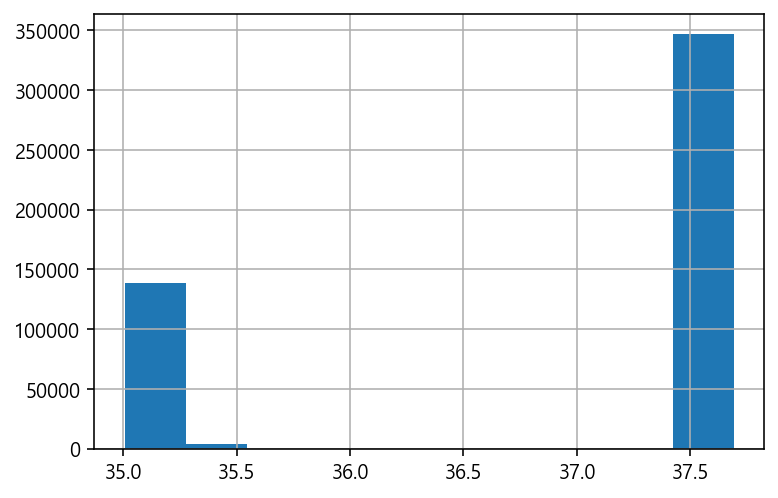

In [27]:
df_data['위도'].hist()

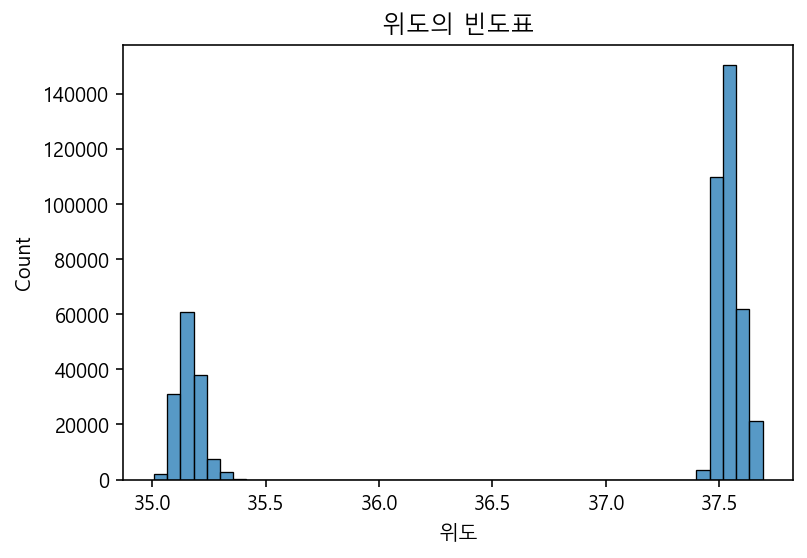

In [28]:
sns.histplot(x='위도', data=df_data, palette="viridis").set_title("위도의 빈도표")
plt.show()

②	경도의 빈도표를 시각화

<AxesSubplot:>

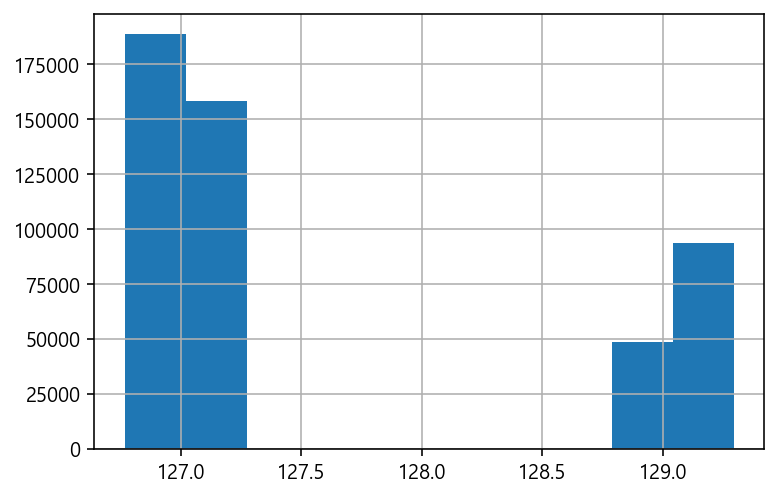

In [29]:
df_data['경도'].hist()

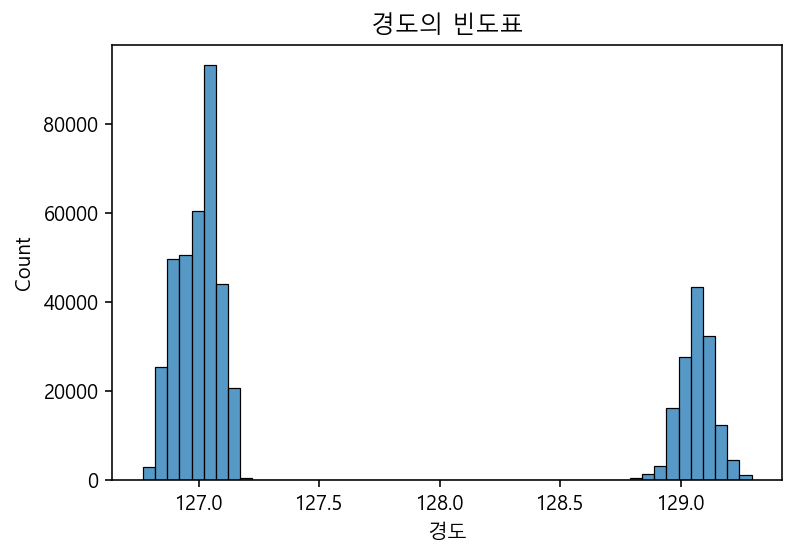

In [30]:
sns.histplot(x='경도', data=df_data, palette="viridis").set_title("경도의 빈도표")
plt.show()

### 8.	상관계수
①	전체 숫자 컬럼끼리의 상관계수

In [31]:
df_data.corr()

,index,지번본번지,건물본번지,경도,위도
index,1.000000,-0.097934,-0.008926,-0.468637,0.470091
지번본번지,-0.097934,1.000000,0.048808,0.193297,-0.209592
건물본번지,-0.008926,0.048808,1.000000,0.001484,0.003518
경도,-0.468637,0.193297,0.001484,1.000000,-0.994459
위도,0.470091,-0.209592,0.003518,-0.994459,1.000000


②	상관계수를 이용하여 headmap 시각화

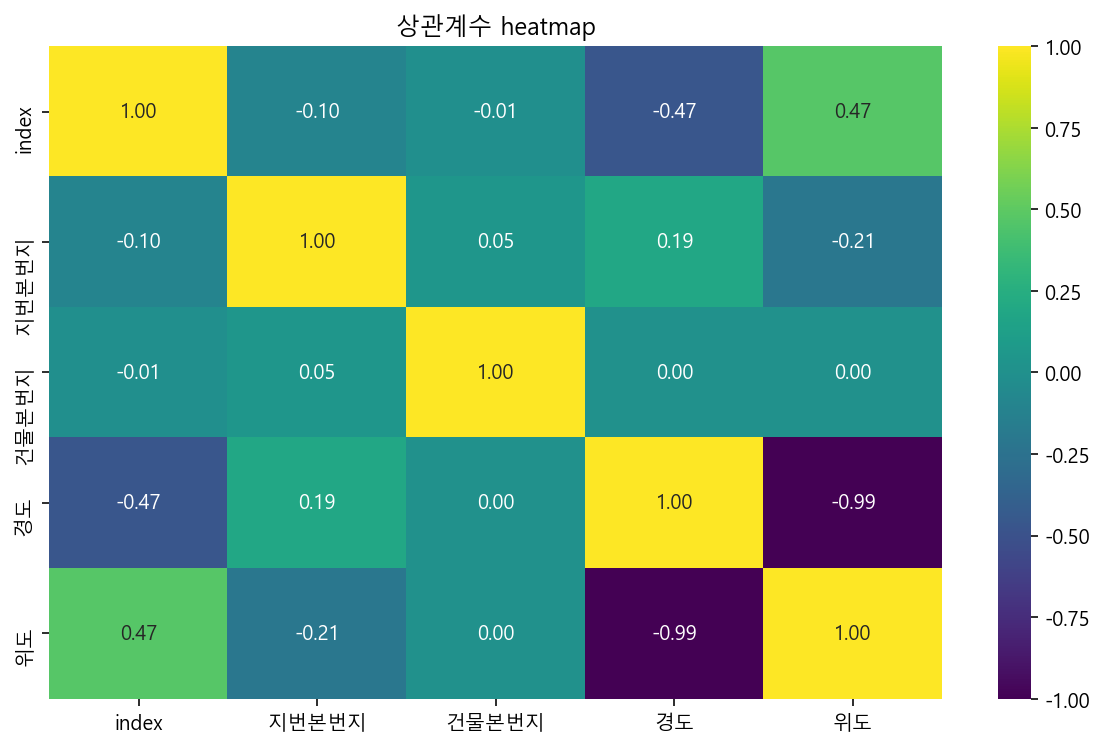

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df_data.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis', fmt='.2f').set_title("상관계수 heatmap")
plt.savefig('data/ch13_example2-1.png')

### 9.	경도와 위도 컬럼을 이용하여 산점도
①	X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

In [33]:
df_data1 = df_data[['위도','경도','시도명']]
df_data1

,위도,경도,시도명
0,37.556197,127.159471,서울특별시
1,37.562176,126.924660,서울특별시
2,37.550689,126.919845,서울특별시
3,37.471190,126.937790,서울특별시
4,37.493054,127.147321,서울특별시
...,...,...,...
488526,35.170857,129.100584,부산광역시
488527,35.260185,129.220741,부산광역시
488528,35.188529,129.096057,부산광역시
488529,35.100503,128.980941,부산광역시


<AxesSubplot:xlabel='경도', ylabel='위도'>

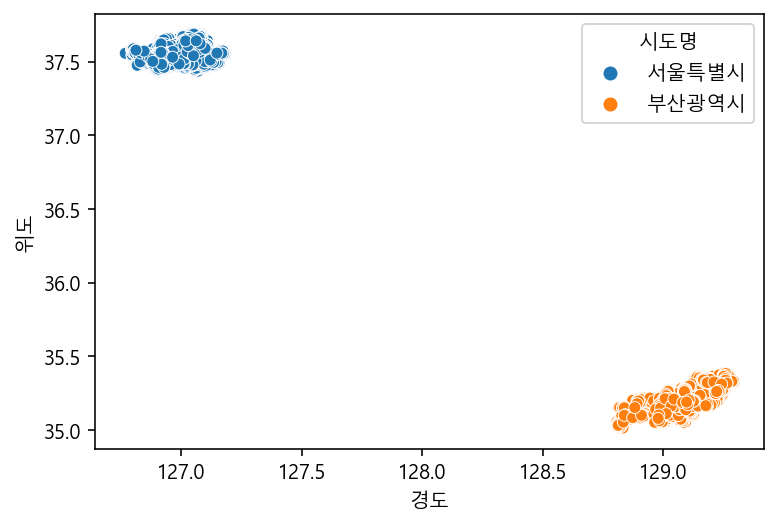

In [34]:
sns.scatterplot(x='경도', y='위도', data=df_data1, hue='시도명')

②	경도와 위도의 산점도를 “시도명” 컬럼별로 서브플롯으로 시각화

In [35]:
df_data2 = df_data1.sample(10000)

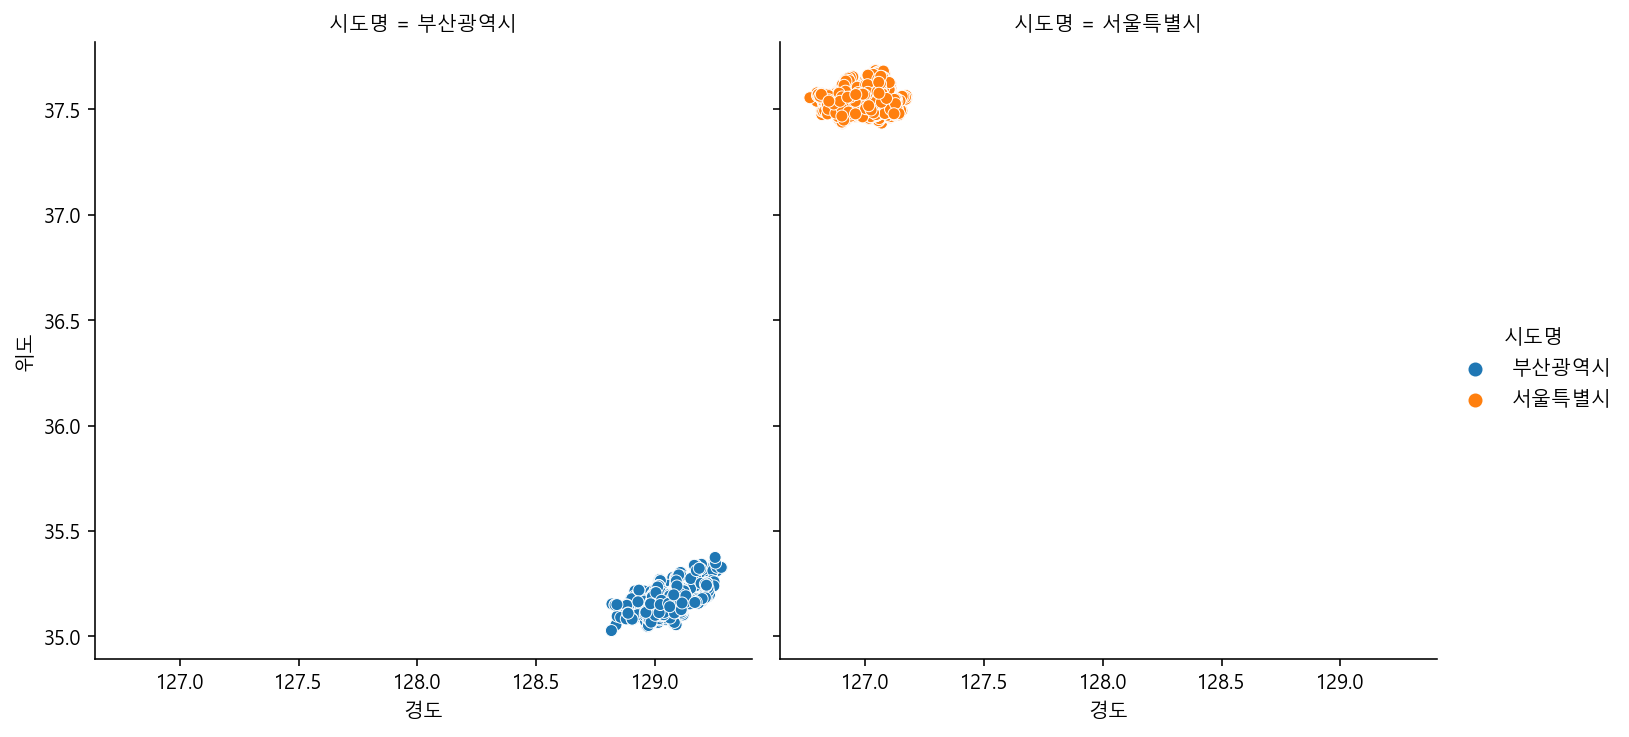

In [36]:
sns.relplot(x='경도', y='위도', data=df_data2, col='시도명', hue='시도명')

③	위의 1번에서 시각화된 산점도를 바탕으로 회귀선을 그린다.

<AxesSubplot:xlabel='경도', ylabel='위도'>

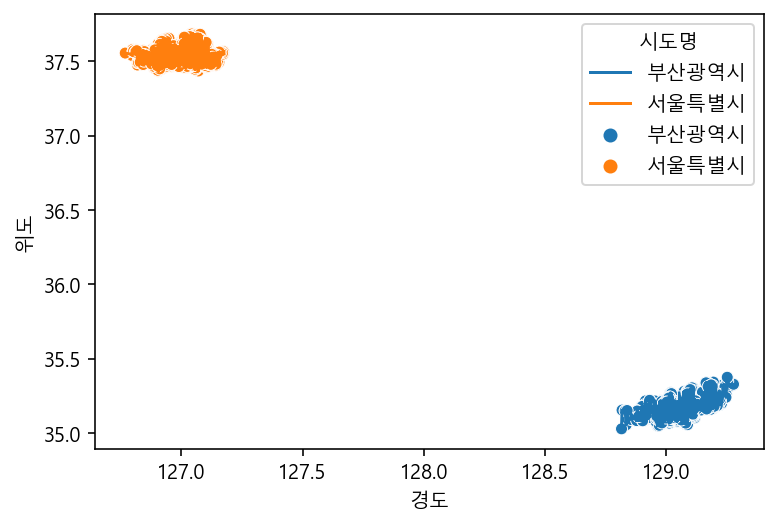

In [37]:
sns.scatterplot(x='경도', y='위도', data=df_data2, hue='시도명')
sns.lineplot(x='경도',y='위도', data=df_data2, hue='시도명')

### 10.	상권업종대분류명별 상호명의 개수를 도출하고 시각화하기

In [38]:
df_data2 = df_data.groupby('상권업종대분류명')['상호명'].count()
df_data2 = df_data2.to_frame().sort_values(by='상호명')
df_data2

,상호명
상권업종대분류명,
스포츠,965
숙박,4411
관광/여가/오락,11234
부동산,19124
학문/교육,34474
생활서비스,82671
소매,148357
음식,187293


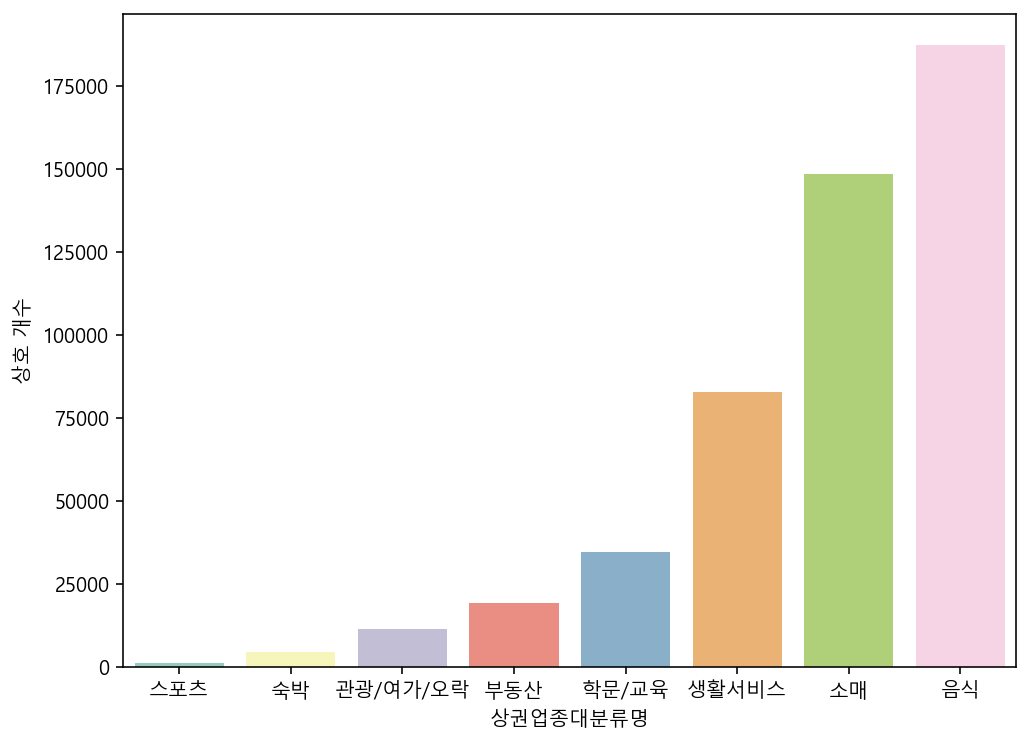

In [39]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df_data2.index, y='상호명', data=df_data2, palette='Set3').set_ylabel('상호 개수')

In [40]:
df_data.groupby('상권업종대분류명')['상호명'].value_counts().to_frame()

상호명
상권업종대분류명 상호명               
관광/여가/오락 장동민의옹피씨        151
         휠라              35
         앵콜노래연습장         31
         팡팡노래연습장         31
         스타노래방           25
...                     ...
학문/교육    힘찬나래국제태권도장       1
         힘찬나래태권도          1
         힘찬수학보습학원         1
         힘찬어린이집           1
         힘찬키즈스포츠&태권도스쿨    1

[336327 rows x 1 columns]

### 11.	상권업종대분류명이 음식인 서브셋을 이용한 분석
①	“상권업종대분류명”이 음식인 서브셋을 변수 df_food에 할당하고 확인

In [43]:
df_food = df_data[df_data['상권업종대분류명']=='음식']
df_food.head()

,index,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197
1,1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176
2,2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689
3,3,제이씨에스푸드,음식,한식,한식/백반/한정식,서울특별시,관악구,서림동,신림동,대지,118,서울특별시 관악구 신림동 118-33,서울특별시 관악구 신림로14길,3,서울특별시 관악구 신림로14길 3,126.937790,37.471190
11,11,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,서울특별시 서초구 동광로18길 82,126.991394,37.488375


②	“상권업종대분류명”이 음식이면서, "시군구명”이 강남구 데이터만 가져와 “상권업종중분류명”별로 빈도수를 구함(loc함수를 이용 vs loc함수 이용안함)

In [51]:
df_food[df_food['시군구명']=='강남구']['상권업종중분류명'].value_counts()

한식         4594
커피점/카페     2951
양식         1644
유흥주점       1373
일식/수산물     1226
분식         1114
패스트푸드       679
제과제빵떡케익     637
닭/오리요리      462
중식          400
별식/퓨전요리     262
부페           65
기타음식업        47
음식배달서비스      11
Name: 상권업종중분류명, dtype: int64

In [49]:
df_food[df_food['시군구명']=='강남구'].loc[:,['상권업종중분류명']].value_counts()

상권업종중분류명
한식          4594
커피점/카페      2951
양식          1644
유흥주점        1373
일식/수산물      1226
분식          1114
패스트푸드        679
제과제빵떡케익      637
닭/오리요리       462
중식           400
별식/퓨전요리      262
부페            65
기타음식업         47
음식배달서비스       11
dtype: int64

### 12.	df 데이터셋에서 “상권업종대분류명”이 음식인 데이터 중 서울특별시 데이터 서브셋
①	“상권업종대분류명”이 음식인 서브셋 중 서울특별시 데이터만 변수 df_seoul_food에 할당하고 확인

In [54]:
df_seoul_food = df_food[df_food['시도명']=='서울특별시']
df_seoul_food.head(3)

,index,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197
1,1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176
2,2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689


②	df_seoul_food 데이터 셋을 시군구명, 상권업종중분류명으로 그룹화하여 상점수를 count한 내용을 food_gu 변수에 할당

In [60]:
food_gu = df_seoul_food.groupby(['시군구명', '상권업종중분류명'])['상호명'].count().to_frame()

③	food_gu 변수를 다음과 같은 스타일의 표로 출력(groupby 이용).

In [67]:
food_gu_temp = food_gu.unstack()
food_gu_temp.columns = food_gu_temp.columns.droplevel(level=0)
food_gu_temp

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,462.0,262.0,65.0,1114.0,1644.0,1373.0,11.0,1226.0,637.0,400.0,2951.0,679.0,4594.0
강동구,5.0,303.0,120.0,28.0,532.0,175.0,672.0,4.0,380.0,254.0,121.0,829.0,250.0,1852.0
강북구,3.0,196.0,73.0,6.0,327.0,74.0,411.0,5.0,177.0,122.0,61.0,334.0,127.0,1262.0
강서구,20.0,345.0,136.0,29.0,604.0,389.0,847.0,3.0,482.0,284.0,174.0,1107.0,279.0,2182.0
관악구,12.0,320.0,98.0,13.0,556.0,302.0,786.0,4.0,354.0,192.0,139.0,748.0,212.0,1631.0
광진구,10.0,339.0,125.0,22.0,576.0,284.0,733.0,2.0,407.0,230.0,180.0,909.0,241.0,1719.0
구로구,8.0,286.0,100.0,21.0,447.0,112.0,672.0,5.0,266.0,164.0,248.0,642.0,189.0,1463.0
금천구,9.0,188.0,87.0,13.0,301.0,85.0,405.0,1.0,190.0,117.0,111.0,501.0,107.0,1065.0
노원구,11.0,333.0,84.0,13.0,457.0,146.0,453.0,6.0,260.0,226.0,118.0,632.0,244.0,1268.0


④	위 3번 스타일의 표를 pivot_table함수를 이용하여 출력

In [68]:
df_seoul_food.pivot_table(index='시군구명', values='상호명', columns='상권업종중분류명', aggfunc='count')

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,462.0,262.0,65.0,1114.0,1644.0,1373.0,11.0,1226.0,637.0,400.0,2951.0,679.0,4594.0
강동구,5.0,303.0,120.0,28.0,532.0,175.0,672.0,4.0,380.0,254.0,121.0,829.0,250.0,1852.0
강북구,3.0,196.0,73.0,6.0,327.0,74.0,411.0,5.0,177.0,122.0,61.0,334.0,127.0,1262.0
강서구,20.0,345.0,136.0,29.0,604.0,389.0,847.0,3.0,482.0,284.0,174.0,1107.0,279.0,2182.0
관악구,12.0,320.0,98.0,13.0,556.0,302.0,786.0,4.0,354.0,192.0,139.0,748.0,212.0,1631.0
광진구,10.0,339.0,125.0,22.0,576.0,284.0,733.0,2.0,407.0,230.0,180.0,909.0,241.0,1719.0
구로구,8.0,286.0,100.0,21.0,447.0,112.0,672.0,5.0,266.0,164.0,248.0,642.0,189.0,1463.0
금천구,9.0,188.0,87.0,13.0,301.0,85.0,405.0,1.0,190.0,117.0,111.0,501.0,107.0,1065.0
노원구,11.0,333.0,84.0,13.0,457.0,146.0,453.0,6.0,260.0,226.0,118.0,632.0,244.0,1268.0


⑤	3번의 결과 중 강남구 데이터만 뽑아 barplot으로 시각화(판다스 plot이용)

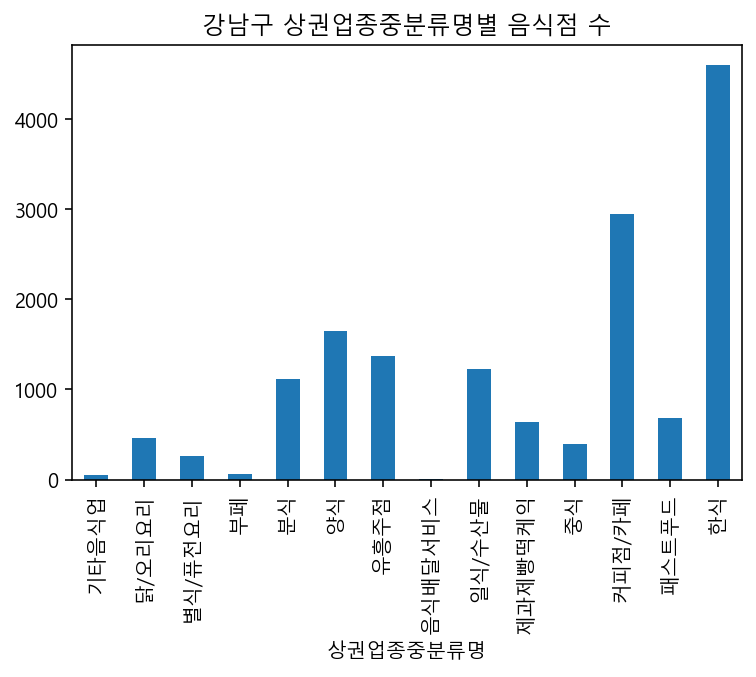

In [73]:
food_gu_temp.loc['강남구'].plot(kind='bar').set_title("강남구 상권업종중분류명별 음식점 수")
plt.show()

⑥	3번의 결과를 seaborn을 이용하여 구별 음식점 상호 개수를 시각화

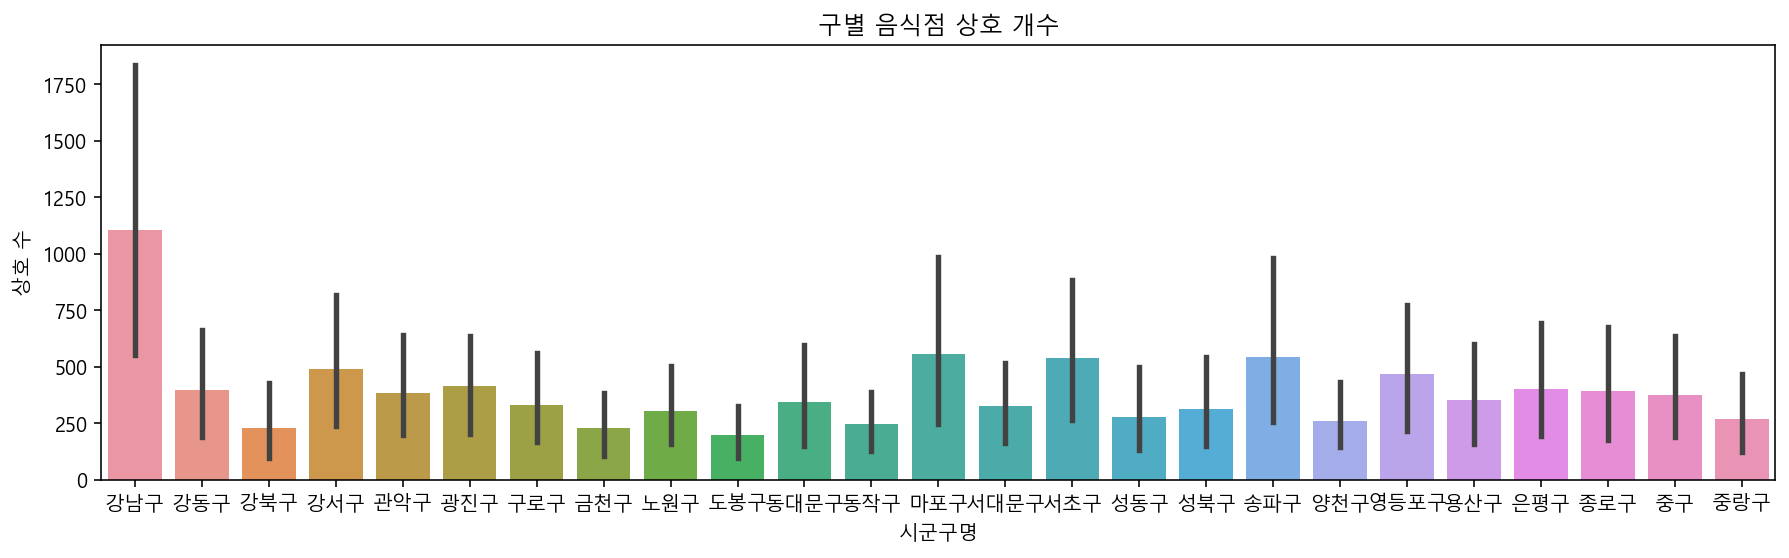

In [79]:
plt.figure(figsize=(15,4))
sns.barplot(data=food_gu_temp.T).set_title("구별 음식점 상호 개수")
plt.ylabel("상호 수")
plt.savefig('data/ch13_example2-2.png')

⑦	상권업종중분류명별 음식점 상호갯수

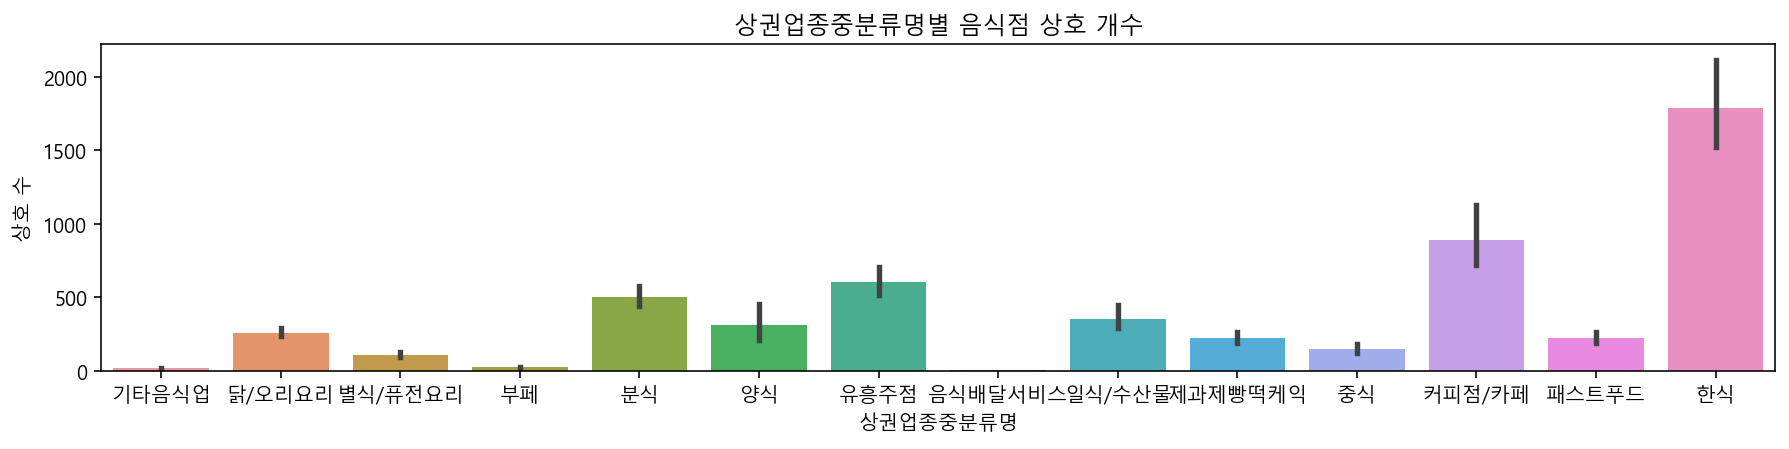

In [81]:
plt.figure(figsize=(15,3))
sns.barplot(data=food_gu_temp).set_title("상권업종중분류명별 음식점 상호 개수")
plt.ylabel("상호 수")
plt.savefig('data/ch13_example2-3.png')

⑧	Seaborn의 catplot을 이용하여 상권업종중분류별 음식점을 구별로 시각화(서브플롯으로 시각화)

In [84]:
food_gu2 = food_gu_temp.reset_index()

<Figure size 2160x2160 with 0 Axes>

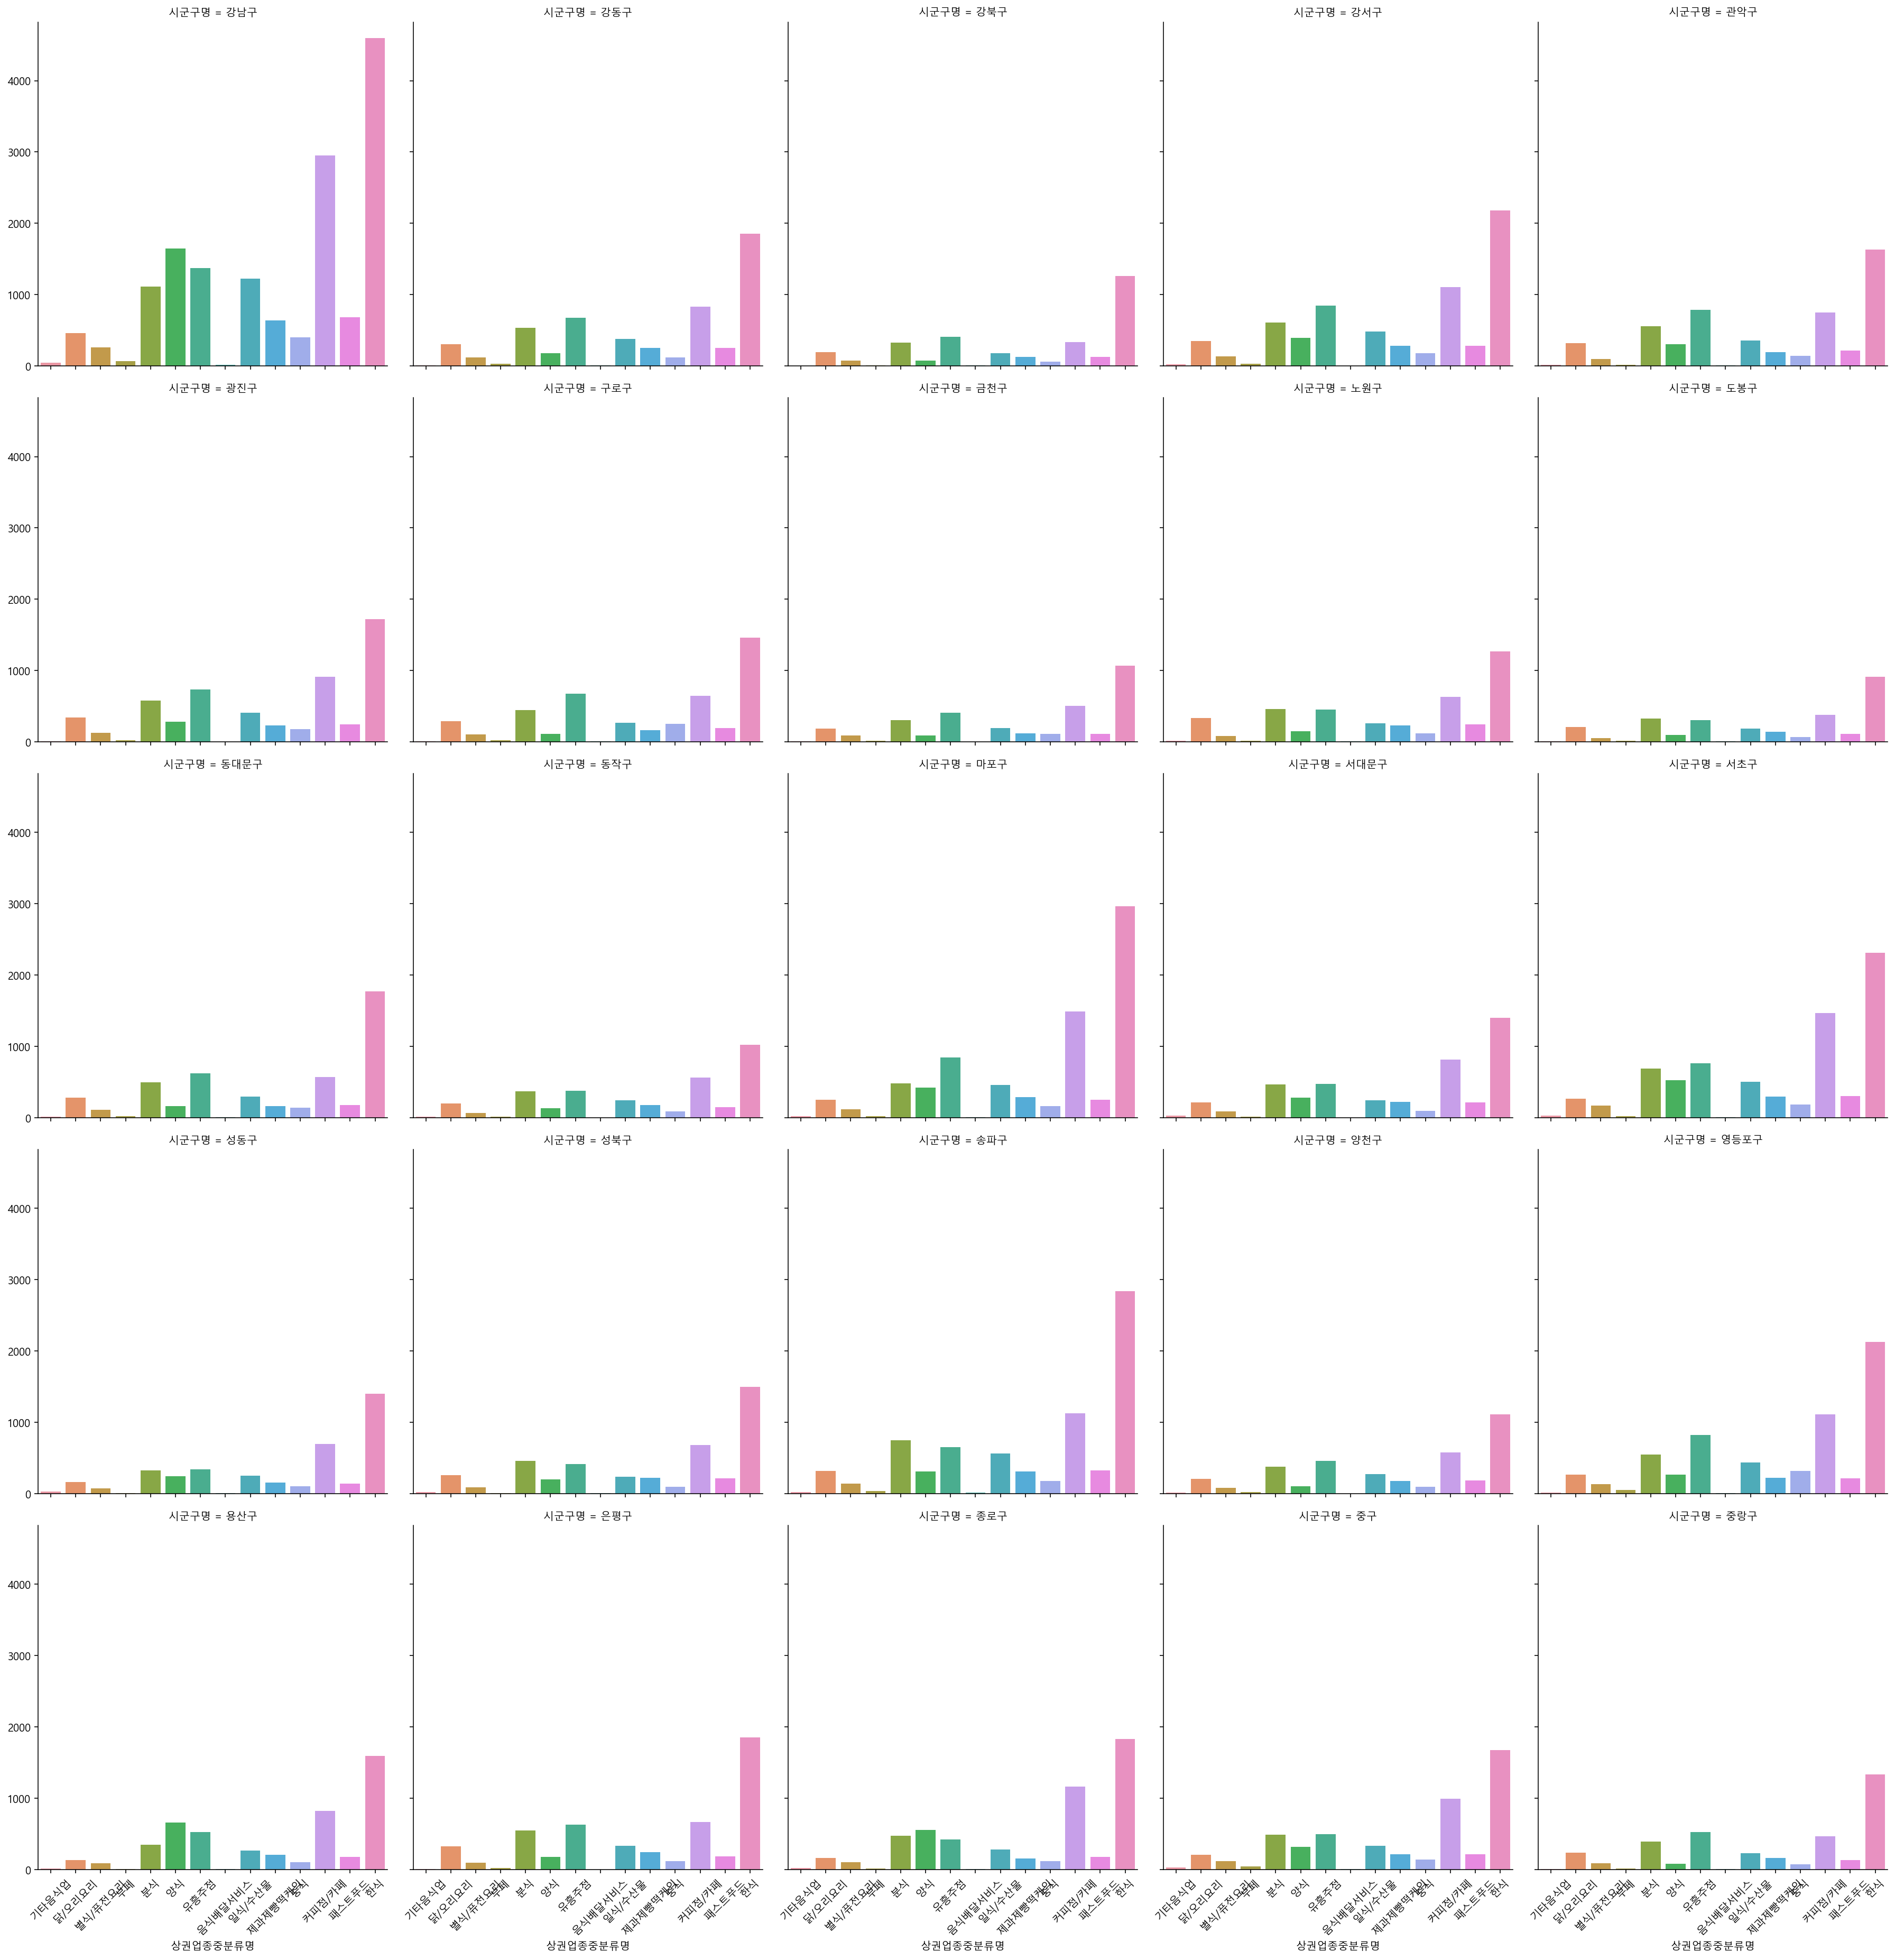

In [86]:
plt.figure(figsize=(30,30))
sns.catplot(data=food_gu2, col='시군구명', col_wrap=5, kind='bar').set_xticklabels(rotation=45)
plt.savefig('data/ch13_example2-4.png')

⑨	Seaborn의 catplot을 이용하여 구별 음식점을 상권업종중분류명별로 서브 플롯으로 시각화

In [94]:
food_gu3 = food_gu_temp.T

In [95]:
food_gu3 = food_gu3.reset_index()

<Figure size 1800x1080 with 0 Axes>

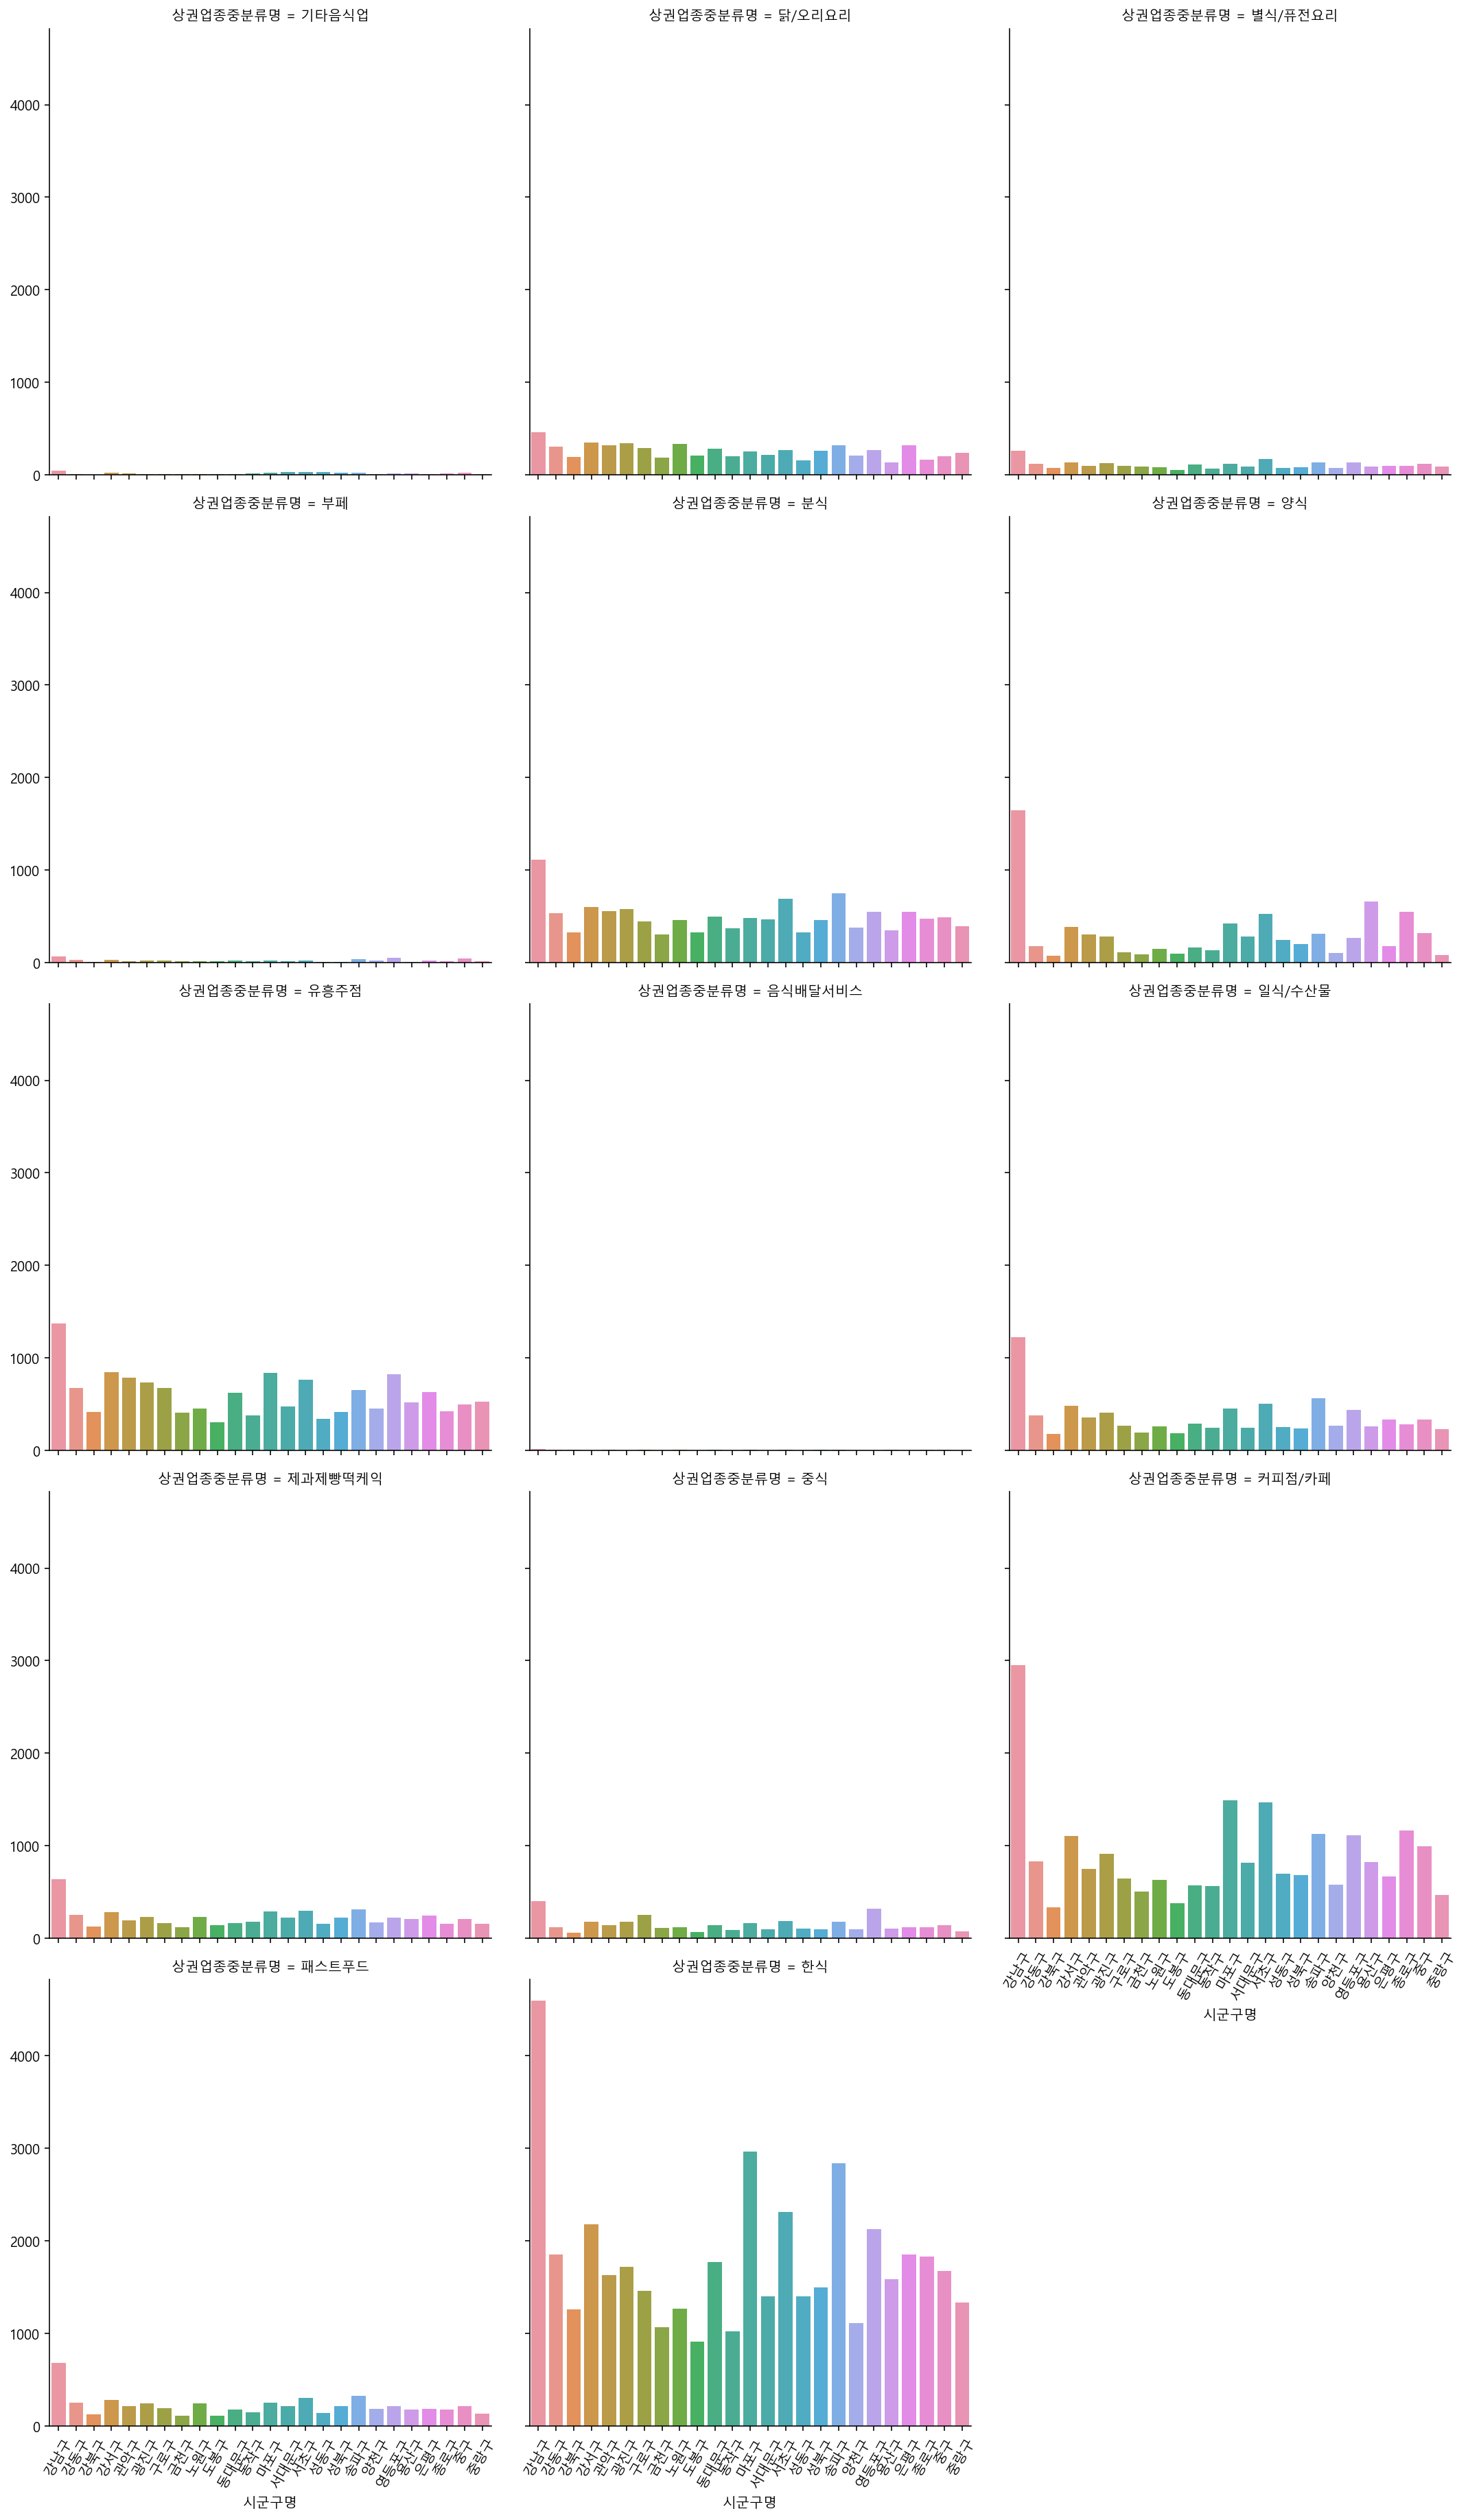

In [99]:
plt.figure(figsize=(25,15))
sns.catplot(data=food_gu3, kind='bar', ci=None, col='상권업종중분류명', col_wrap=3).set_xticklabels(rotation=60)
plt.savefig('data/ch13_example2-5.png')

### 13.	구별로 학원수 비교 : 서울 대치동이나 목동에 사교육이 발달되었다는 가설을 뒷받침할 수 있는 분석
①	서울시 학원(상권업종대분류명 이용) 데이터를 df_academy 변수에 할당하고 확인

②	df_academy 데이터 셋을 상호명별로 빈도수 출력(value_counts()함수 이용하거나 groupby이용)

③	df_academy 데이터 셋을 상호명별로 빈도수 상위 10개 출력

④	df_academy 데이터 셋을 시군구명 별로 빈도수 출력(학원이 가장 많은 구부터 출력)

⑤	df_academy 데이터 셋에서 어떤 종류의 학원들이 많은지 상위 30개만 academ_count변수에 할당하고 출력(상권업종소분류명 컬럼 이용)

⑥	df_academy 데이터셋에서 상권업종소분류명별로 빈도수를 구했을 때 빈도가 1000이상인 데이터만 따로 academy_count_1000변수에 할당

⑦	df_academy 데이터셋을 “시군구명”, "상권업종소분류명” 별 상호명 빈도수를 academy_group 변수에 할당 출력

⑧	academy_group 데이터셋에서 강남구 데이터만 출력 및 시각화(barplot)

⑨	df_academy데이터 중 “법정동명”컬럼이 “대치동”과 “목동”인 데이터만 가져와 상권업종소분류명별 빈도수 출력

⑩	“상권업종소분류명”별 "시군구명” 별 상호명 빈도수를 g변수에 할당하고 출력

⑪	g변수의 내용중 "상권업종소분류명” 컬럼이 “학원-입시”데이터만 시각화(pandas의 plot.bar, pandas의 barh,seaborn의 barplot –seaborn으로 barplot을 그릴 경우 g 변수의 내용을 reset_index()하여야 합니다)

### 14.	서울시 데이터만 경도와 위도를 산점도로 시각화
①	df_academy 데이터셋의 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

②	df_academy 데이터셋의 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

③	df_academy 데이터셋 중 “학원-입시” 데이터만, 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

④	df_academy 데이터셋 중 “어린이집” 데이터만, 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

⑤ df_academy 데이터셋 중 “학원-입시”데이터와 "어린이집" 데이터만, 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화